# 推測統計(inferential statistics　標本から母集団の特徴を推測)

#### データ準備

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
#tips.csvのロード
df = sns.load_dataset('tips')
#合計に対してチップが占める割合のカラム"tip_rate"を追加する
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 平均の標本分布

$
Z = \frac{x_i - \bar{x}}{s}
$

In [3]:
#推測統計
#・標本から母集団のデータの特徴を推測する
# →標本と母集団の設定が不適切であれば、その後のロジックが全て破綻するので、慎重に行う必要がある

#母集団と標本
#・基本は母集団から無作為抽出で標本を作成する
#・完全にランダムにするのは困難なので、ある程度ランダムになるように努力する
#・すでに標本がある場合、無理のない範囲の母集団を設定する

#標本統計量と母数
#・統計量：分布の特徴を表す値(平均、標準偏差など)
#・標本統計量：標本から計算された統計量
#・母数：母集団の統計量(推測統計で推測したい値)

#標本分布(sample distribution)
#・標本の中身は確率的に変動する
# 全国の成人男性をランダムに抽出して各標本の身長の平均を取る場合、
#　　１回目の抽出の1000人の平均と２回目の1000人の平均は違うはず
# (標本は重ならないはずなので、標本の中身が違う)
#・標本統計量も同様に確率的に変動する値＝確率変数
# 標本自体が変動するから、標本統計量も変動する
#・標本分布：標本統計量が従う確率分布
#         その標本統計量がどれくらいの確率で得られるのか？
#         →確率分布のどのあたりに位置するのか
#          よく出てくる値なのか、滅多に出てこない値なのか
#・標本分布は「ある標本の中の分布」ではないことに注意する
#　　標本平均が背後に持つ確率分布のこと
#　　理論上の分布である

#推定量(estimator)
#・母数の推定に使う標本統計量
#　　標本平均値　ー　母平均
#　　標本比率　ー　母比率
#　　標本相関係数　ー　母相関係数
# ※標本分散、標本標準偏差は母分散および母標準偏差には使えない(もっとふさわしいものがある→不偏分散)
#・推定値：実際の値

#不偏性(unbiasedness)
#・推定量が"平均的に"母数と一致する場合、その推定量は「不偏性がある」という
# もし不偏性がある推定量と不偏性がない推定量があった場合、不偏性があるほうが推定量として適している
#・不偏推定量(unbiased estimator):不偏性がある推定量
#・確率の文脈では平均のことを期待値という
#
#-例-
#標本の平均値の期待値は母平均に一致する
#・大量に標本を取って標本平均を計算したら、その標本平均は母平均に近づく
#　　→平均の標本分布の平均＝母平均

#平均の標本分布
#・平均の標本分布の平均は母平均と同じμになる
#・平均の標本分布の分散は母分散をnで割った値σ2/nになる
# n：標本の大きさ(標本の中にどれくらいのデータがあるか)
# nが大きくなればなるほど平均の標本分布のばらつきは小さくなって分散も小さくなる
# →標本の大きさをたくさん取れば、毎回計算される標本平均は母平均μに近づく
#  n＝無限、母集団の数と同じ、と考えることもできる

#-例-
#データセットを母集団と見立てて50個の標本を１００回抽出した時の標本平均値の分布(平均と分散)
sampled_means =[] #標本平均のリスト
sampled_num = 50  #抽出する標本の個数
sampled_cnt = 100 #抽出回数
column = 'tip'    #カラム名

for i in range(sampled_cnt):
    #標本抽出
    sampled_df = df.sample(sampled_num)
    
    #標本の平均
    sampled_mean = sampled_df[column].mean()
    #リストに追加
    sampled_means.append(sampled_mean)

In [6]:
#100個の標本が抽出できたか確認
len(sampled_means)

100

In [4]:
sampled_means

[3.0016000000000003,
 3.249600000000001,
 3.0942000000000003,
 2.8648000000000002,
 3.1078,
 3.0931999999999995,
 2.8432000000000013,
 3.0334,
 3.0584,
 2.97,
 3.007200000000001,
 2.7464,
 2.8376000000000006,
 3.2343999999999995,
 3.0822000000000003,
 3.0324,
 2.9402000000000004,
 3.0023999999999997,
 2.7823999999999995,
 3.0258000000000003,
 3.0148,
 2.737600000000001,
 3.0822,
 2.8944,
 3.1346000000000003,
 2.7288000000000006,
 2.7154000000000003,
 3.2245999999999992,
 3.1513999999999998,
 3.0156,
 3.0416,
 2.8341999999999996,
 2.887,
 2.9375999999999993,
 3.1212000000000004,
 2.7407999999999992,
 2.9610000000000003,
 2.9575999999999993,
 2.9317999999999995,
 3.0976000000000004,
 2.8489999999999993,
 2.855399999999999,
 3.0014000000000003,
 2.7782,
 2.881,
 3.127,
 2.636999999999999,
 2.702,
 2.8813999999999997,
 2.7510000000000003,
 2.9194000000000004,
 3.276,
 2.8882000000000003,
 2.8678,
 2.785,
 3.020400000000001,
 2.8198000000000003,
 2.9791999999999996,
 3.1715999999999993,
 3.

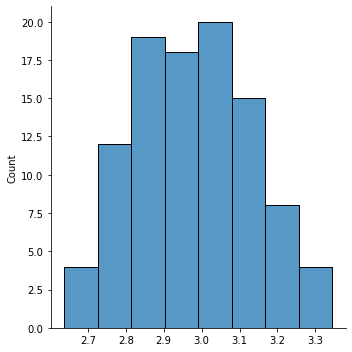

In [5]:
#ヒストグラム
#※標本分布ではないが、標本分布にかなり近い分布になる→ループの回数を増やせばより標本分布に近づく
sns.displot(sampled_means)

In [7]:
#標本の平均の確認
np.mean(sampled_means)

2.9728120000000002

In [15]:
#母集団の平均(母平均)
#標本の平均が母平均からどれくらい離れているかを確認→かなり近い
df[column].mean()

2.9982786885245902

In [17]:
#標本の分散
np.var(sampled_means)

0.03250390887600002

In [19]:
#母集団の分散(母分散σ2)/n
np.var(df[column])/sampled_num

0.03813217024993285

## 不偏分散(unbiased variance)

$
s'^2 = \frac{1}{n - 1} \sum_{i = 1}^n {(x_i - \overline{x})^2}\\
分散\\
s^2 = \frac{1}{n} \sum_{i = 1}^n {(x_i - \overline{x})^2}
$

In [6]:
#不偏性：平均的にその母数に一致する統計量

#不偏分散
#・母分散の不偏推定量
# 平均μ分散σ2の母集団からn個の標本を無限回取る
#　　　↓
# 不偏分散を計算してみる
#　　　↓
#　　不偏分散の標本分布の平均は母集団の分散σ2と一致する(不偏性の定理)
#　　※普通の分散の標本分布を取ると、その平均は母集団の分散にはならない→普通の分散には不偏性はない
#・分散の式において、n-1で割った値※nで割った値ではない！
#・通常の標本分散をs2で表し、不偏分散をs'2で表す
#
#なぜn-1で割るのか？
#分散を掲載する際に母平均μの代わりに標本平均を使っている
#　　　↓
#標本平均を使うことによって、分散が過小評価されてしまう
#　　　↓
#過小評価してしまった分散にn/n-1(1よりちょっと大きい値)をかけることで補正する(つまり、nではなくてn-1で割る)
#※公式の1/(n-1)を自由度と呼ぶこともある

#-例-
#scipyのメソッドでもnumpyのメソッドでも求めることができる
#scipyのメソッド
#stats.tvar(a)
stats.tvar(df['tip'])

1.914454638062471

In [4]:
#普通の分散
#※不偏分散よりも少し小さくなっていることを確認
np.var(df['tip'])

1.9066085124966428

In [12]:
#numpyのメソッド
#np.var(a, ddof=1)
# ddof(delta degree of freedom):自由度のデルタ(変量。自由度の差分。微少差分)。不偏分散の場合は１指定
np.var(df['tip'], ddof=1)

1.9144546380624725

In [2]:
#不偏分散の平方根 ※不偏標準偏差ではないので注意
#scipyのメソッドでもnumpyのメソッドでも求めることができる
#1.np.sqrt(a)
#2.stats.tstd(a)
#3.np.std(a, ddof=1)

#1.numpyで分散の平方根を求める
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [8]:
#2.scipyのメソッド
stats.tstd(df['tip'])

1.3836381890011822

In [9]:
#普通の分散の平方根
np.std(df['tip'])

1.3807999538298958

In [10]:
#3.numpyのメソッド
#ddofを1に指定すると不偏分散の平方根が求められる
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不偏性

In [4]:
#不偏分散の平方根の不偏性
#標本標準偏差は母標準偏差の推定量には使えない(分散が過小評価されているから)
#　　　↓
#不偏分散の平方根s'を母集団の標準偏差σの推定量として使う
#※ただし、不偏分散の平方根s'は不偏性を持っていないので注意
#  s'の標本分布の平均はσにはならない
#・不偏分散の平方根は母集団の標準偏差σの「不偏」推定量にはならない
#・不偏分散の平方根を「不偏標準偏差」と呼ぶのは間違い。「不偏分散の平方根」という

#-例-
#データセットを母集団と見立てて50個の標本を１００回抽出した時の標本の分散と不偏分散の平均を確認する
#※不偏分散の平均は母集団の分散σ2に近くなるはず
sampled_vars =[]  #標本の分散のリスト
sampled_tvars =[] #標本の不偏分散のリスト
sampled_num = 50  #抽出する標本の個数
sampled_cnt = 100 #抽出回数
column = 'tip'    #カラム名

for i in range(sampled_cnt):
    #標本抽出
    sampled_df = df.sample(sampled_num)
    
    #標本の分散
    sampled_var = np.var(sampled_df[column])
    #不偏分散
    sampled_tvar = stats.tvar(df[column])

    #リストに追加
    sampled_vars.append(sampled_var)
    sampled_tvars.append(sampled_tvar)

In [8]:
#標本の不偏分散の平均が母分散と近くなっているかを確認
#※回数を多くすればするほど標本の不偏分散は母分散に近づく
#標本の不偏分散の平均
np.mean(sampled_tvars)

1.9144546380624705

In [7]:
#母集団の分散(母分散)
#→不偏分散の平均と近い値になっている
np.var(df[column])

1.9066085124966428

In [21]:
#標本の分散の平均
#→不偏分散の平均よりも値が小さい
np.mean(sampled_vars)

1.8032076899999998

## 比率の区間推定

In [2]:
#推測統計
#・統計学を学ぶ一番のモチベーション
#・統計学において最も重要な分野の一つ
#・大きく分けて「推定」と「検定」がある
# １．推定
#　　　・母集団から標本を抽出し、その標本から統計量を計算して母集団の特定値、母数を推定する
# 2.検定
#　　 ・2つの標本があるとして、それぞれの背後の母集団の平均、比率、分散等の統計量は同じなのか？を検定する
# 　・その標本の母集団は正規分布と言えるか？をテストしたりする

#1.推定
#・点推定と区間推定がある(基本的な考え方はどちらも同じ)
#　　点推定
#　　・バシッと1つの値で推定　「母数は⚪︎⚪︎だ！」
#　　区間推定
#　　・区間を持って推定　「母数は⚪︎⚪︎〜xxの間かな」
#　　※普通、推定といったら区間推定を指す

#比率の区間推定
#・標本の(カテゴリ変数の)比率の値から母集団の比率の値を推定する
#・実際に比率の区間推定が応用されている例は多い(選挙速報、内閣支持率、視聴率etc...)
#
# 区間推定とは
# ・母数の値を区間を持って推定する(例:母比率は0.5〜0.7)
# ・区間と共に確度をつける(例:95%の確度で母比率は0.5〜0.7)
# →この区間を信頼区間(CI:confidence interval)という(例:95%の信頼区間で母比率は0.5〜0.7)
#  標本をとるうちに、真の母数の比率を含まない区間も出てくる
#  95%の信頼区間の場合、「100回中5回くらいしか間違わない」ことを意味する
#  ※確度の話であり、確率のことではないので注意→「95%の確率で母数がこの区間にある」とは言わない

#区間推定のやり方
#1.標本を無作為抽出する(もし標本がすでにあったら、無理のない範囲で母集団を設定する)
#2.標本から推定量(標本比率)を計算する→点推定はこの時点で完了
# 　　標本比率60%の場合
# 　　　　　　この値がどれくらいの確率で得られるかを考える　　
# 　　　　　　本来はもっと低い値なのにたまたま高い値が出たのか
# 　　　　　　それなりに妥当な数字なのか...
# 　　　　　　→標本比率自体は確率変数と見ることができ、その背後には確率分布があり、それを標本分布という
# 　　　　　　　　比率の標本分布がどのようなものになるかを考える
#3.信頼区間を設定する
# 　　信頼区間は95%で設定するのが一般的
#4.推定量(ここでは比率)の標本分布を求める
# 　比率の標本分布
# 　・二項分布から考えることができる
# 　　　ある観察や試行を複数回行った場合にある事象が起こる回数が従う確率分布
# ・(nが十分大きければ)比率の標本分布は平均p、分散pq/nの正規分布になる
# 　→nやpによって分布の形状が変わって扱いづらいので、標準化して標準正規分布で考える
#5.信頼区間の値を標本分布から算出する
# 　標準正規分布が95%区間で取りうる値
#  比率の標本分布を標準化し、標準正規分布を計算する
# 　　→ −1.96〜1.96の区間になる母比率pを算出する
# 　 ※−1.96〜1.96という値を使うために標準化した

#比率の区間推定を求める
#※binomなので、やっていることは二項分布
#stats.binom.interval(alpha, n, p)
#引数
# alpha:信頼区間(例えば95%だったら0.95)
# n:標本の大きさ
# p:標本の比率
#戻り値
# 数(タプルの形式)※比率ではないので注意！

#-例-
#1000人に世論調査した時の標本比率60%、信頼区間９5%で区間推定すると母比率はどうなるか
stats.binom.interval(0.95, 1000, 0.6)

#結果
#　戻り値は(570, 630)、つまり1000人中570〜630人
#　1000人中、570〜630人が95%の区間
# →95%の信頼区間で、母比率は57%から63%である言える

(570.0, 630.0)

In [3]:
#信頼区間が99%だったら？（１００回中１回くらいしか間違わないという事なので、かなり厳しめ）
#　→95%の信頼区間で、母比率は56%から64%であると言える
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [11]:
#-例-
#データセット(tips.csv)を母集団と見立てて50個の標本比率から母比率を区間推定する
#これを１００回繰り返し、何回正しく推定できるか(母比率がその区間の中にちゃんと入っているか)をみる(信頼区間95%)
#男性客の比率を区間推定する
sampled_num = 50  #抽出する標本の個数
sampled_cnt = 100 #抽出回数
alpha = 0.95      #信頼区間
results = []      #結果のリスト

#母比率の計算(母集団の男性の比率)
population_male_ratio = len(df[df['sex'] == 'Male'])/len(df)

for _ in range(sampled_cnt): #"_"は使用しないということを表す
    #標本抽出
    sampled_df = df.sample(sampled_num)
    #標本(男性)の比率
    male_ratio = len(sampled_df[sampled_df['sex']=='Male'])/sampled_num
    
    #比率の区間推定
    #信頼区間(alpha):95%
    #n(標本の大きさ):ここでは抽出した標本の数
    #p(標本の比率):ここでは上記で計算した男性の比率
    #戻り値1:信頼区間95%の男性の最小数
    #戻り値2:信頼区間95%の男性の最大数
    min_num, max_num = stats.binom.interval(alpha, sampled_num, male_ratio)
    #比率に計算する
    min_ratio = min_num/sampled_num
    max_ratio = max_num/sampled_num

    #それぞれの比率が母比率の中に入っているかどうかを確認する
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max':max_ratio, 'correct':correct})

In [12]:
#母比率の計算(母集団の男性の比率)
len(df[df['sex'] == 'Male'])/len(df)

0.6434426229508197

In [13]:
#結果
#わかりやすいようにDataFrameにする
result_df = pd.DataFrame(results)
#correctの割合がどうなっているかを確認する
result_df['correct'].value_counts()

True     96
False     4
Name: correct, dtype: int64

In [14]:
#結果のリストの表示
result_df

,min,max,correct
0,0.46,0.74,True
1,0.52,0.78,True
2,0.44,0.72,True
3,0.54,0.80,True
4,0.46,0.74,True
...,...,...,...
95,0.40,0.68,True
96,0.50,0.76,True
97,0.46,0.74,True
98,0.64,0.88,True


## 平均値の区間推定(Z分布)

In [21]:
#平均値の区間推定
#・統計量は標本平均
#・標本の平均値から母集団の平均値を推定する
#・実際に平均値の区間推定が応用されている例は多い(平均身長、平均体重、平均年収etc・・・)

#平均値の区間推定のやり方
#1.標本を無作為抽出する(もし標本がすでにあったら、無理のない範囲で母集団を設定する)
#2.標本から推定量(標本平均)を計算する→点推定はこの時点で完了
#3.信頼区間を設定する
# 　　信頼区間は95%で設定するのが一般的
#4.推定量(ここでは平均)の標本分布を求める
# 　平均の標本分布
#　　・平均の標本分布の平均は母平均と同じμになる
#　　・平均の標本分布の分散は母分散をnで割った値σ2/nになる
#　　→ここまでだと、どんな形状の分布になるかはわかない。正規分布になるとは限らない
#　　・母集団が正規分布であれば、平均の標本分布は正規分布になる
#
#　　・母集団が正規分布ではなかったら？
#　　　→母集団が正規分布でなくても、標本のサイズが大きければ標本分布は正規分布に近似できる
#　　　　中心極限定理
#　　　　※標本は最低でも5個くらいは取る
#　　　→基本的には平均の標本分布を正規分布と仮定して平均の区間推定をする
#5.信頼区間の値を標本分布から算出する
#　　標準正規分布が95%区間(−1.96〜1.96)で取りうる値
#　　　　平均の標本分布を標準化し、標準正規分布を計算する
#  → −1.96〜1.96という値を使うために標準化した
#　　　　・母集団の標準偏差σは未知なので、不偏分散s'2の平方根s'で代用する
# 　　　　→z分布(平均の標準正規分布)にはちょっと歪みが出る(t分布)

#正規分布を使って平均の区間推定をする
#stats.norm.interval(alpha, loc, scale)
#引数
# alpha:信頼区間(例えば95%だったら0.95)
# loc:標本平均
# scale:標本分布の標準偏差(σが不明の場合は、標本の不偏分散の平方根s'/√n)
#戻り値
# 数(タプルの形式)※比率ではないので注意！

#-例-
#データセット(tips.csv)を母集団と見立てて50個の標本平均から正規分布を使って母平均を区間推定する
#それを１００回繰り返し、何回正しく推定できるかを見る(信頼区間は95%)
#tipのカラムの平均値を区間推定する
sampled_num = 50  #抽出する標本の個数
sampled_cnt = 100 #抽出回数
alpha = 0.95      #信頼区間
column = 'tip'    #カラム名
results = []      #結果のリスト

#母平均の計算
population_mean = df[column].mean()

for _ in range(sampled_cnt): #"_"は使用しないということを表す
    #標本抽出
    sampled_df = df.sample(sampled_num)
    #標本の平均
    sampled_mean = sampled_df[column].mean()
    #標本の不偏分散
    sampled_var = stats.tvar(sampled_df[column])

    #平均の区間推定
    #信頼区間(alpha):95%
    #loc(標本平均):抽出した標本の平均
    #scale(標本分布の標準偏差):σが不明なので、標本の不偏分散(S')のルート/標本の数
    #戻り値1:信頼区間95%の下限
    #戻り値2:信頼区間95%の上限
    min_val, max_val = stats.norm.interval(alpha, sampled_mean, np.sqrt(sampled_var/sampled_num))
    
    #母平均が２つの値の間にあるかどうかを確認する
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max':max_val, 'correct':correct})

In [3]:
#母平均の確認
population_mean

2.9982786885245902

In [4]:
#結果
#わかりやすいようにDataFrameにする
result_df = pd.DataFrame(results)
#Falseの数を数える
result_df['correct'].value_counts()

True     93
False     7
Name: correct, dtype: int64

In [5]:
result_df

,min,max,correct
0,2.559613,3.174387,True
1,2.256952,2.891848,False
2,2.524347,3.192053,True
3,2.705591,3.664809,True
4,2.381699,2.971501,False
...,...,...,...
95,2.425988,3.028812,True
96,2.825605,3.649995,True
97,2.563500,3.500500,True
98,2.585732,3.350268,True


## t分布(student t distribution)

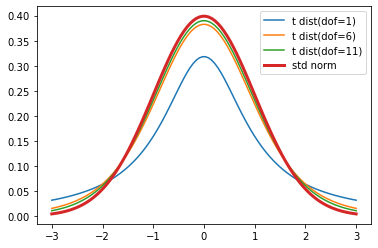

In [20]:
#t分布
#・母標準偏差σの代わりに不偏分散s'2の平方根s'を代用することで変形した分布
#・95%区間が−1.96~1.96ではなくなる
# 95%区間が−1.96~1.96となるのは、あくまでも標準正規分布のお話
#・1つの決まった形にはならない
#・自由度(degree of freedom)n-1をパラメータにとる
#・標準正規分布に比べ、裾野が広くなる
# =同じ信頼区間で取りうる値が広くなる
# 　　−1.96~1.96の面積が９５％にならない
# 　　自由度2だと-4.3~4.3
# =推定が曖昧になる
# 　　自由度99だと−1.98~1.98※これだと標準正規分布に近いので、z分布でも良い
#・n(標本のサイズ。抽出した標本の数)を大きくすると標準正規分布に近づく
# nが十分に大きければ(大体30)、標準正規分布に近似可能
# nが大きくなると裾野が狭くなり、推定区間も狭くなる
# 　　自由度2だとnは3なので、標本は3個
# 　　自由度29だとnは30なので、標本は30個

#t分布を扱う
#stats.t(df).<メソッド>
#確率分布tの引数
# df(degree of freedom):自由度
#メソッド
# rvs()
# pdf()
# cdf() etc...

#-例-
#自由度1,6,11のt分布と標準正規分布が実際にどういうグラフになるかを見る
#pdf:確率密度関数

#x軸
x = np.linspace(-3, 3, 100)
#標準正規分布(normにパラメータを指定しなければ、平均0分散1の標準正規分布となる)
z = stats.norm.pdf(x)
#t分布(自由度１,6,11)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    #t分布の描画
    plt.plot(x, t, label=f"t dist(dof={dof})")

#標準正規分布の描画
plt.plot(x, z, label="std norm", linewidth=3)
#凡例
plt.legend()

## 平均値の区間推定(t分布)

In [18]:
#-例-
#データセット(tips.csv)を母集団と見立てて50個の標本平均から
#正規分布を使った母平均の区間推定と
#t分布を使った母平均の区間推定で
#結果がどう異なるかを見る(信頼区間は95%)

sampled_num = 50 #抽出する標本の個数
alpha = 0.95     #信頼区間
column = 'tip'   #カラム名

#母平均の計算
population_mean = df[column].mean()

#標本抽出
sampled_df = df.sample(sampled_num)
#標本の平均
sampled_mean = sampled_df[column].mean()
#標本の不偏分散
sampled_var = stats.tvar(sampled_df[column])

#平均の区間推定(正規分布)
#信頼区間(alpha):95%
#loc(標本平均):標本の平均
#scale(標本分布の標準偏差):標本の不偏分散(S')のルート
#戻り値1:信頼区間95%の下限
#戻り値2:信頼区間95%の上限
min_val_norm, max_val_norm = stats.norm.interval(alpha, sampled_mean, np.sqrt(sampled_var/sampled_num))

#t分布
#信頼区間(alpha):95%
#loc(標本平均):
#scale(標本分布の標準偏差):標本の不偏分散(S')のルート
#df(自由度):標本の数-1
#戻り値1:信頼区間95%の下限
#戻り値2:信頼区間95%の上限
min_val_t, max_val_t = stats.t.interval(alpha, loc=sampled_mean, scale=np.sqrt(sampled_var/sampled_num), df=(sampled_mean-1))

print("-population mean-")
print(" population_mean: {}".format(population_mean))
print("-sample mean-")
print(" sampled_mean   : {}".format(sampled_mean))
print("-std norm-")
print(" min_val_norm   : {}".format(min_val_norm))
print(" max_val_norm   : {}".format(max_val_norm))
print("-t dist-")
print(" min_val_t      : {}".format(min_val_t))
print(" max_val_t      : {}".format(max_val_t))

#結果
# t分布を使った区間推定の方が正規分布を使った区間推定より値の幅が広くなっている

-population mean-
 population_mean: 2.9982786885245902
-sample mean-
 sampled_mean   : 3.0518
-std norm-
 min_val_norm   : 2.6783936336378784
 max_val_norm   : 3.4252063663621217
-t dist-
 min_val_t      : 2.251587613859439
 max_val_t      : 3.852012386140561


## 比率差の検定(Z-test)

In [3]:
#統計的仮設検定
#・統計的に仮説が正しいかを確かめる
# ある標本2つがある場合、それらの標本の背後にある母集団の平均が同じかどうかを統計的に見ることができる
# それらの数値はたまたま出てきたものなのか、統計的に正しいのかどうか・・・
#・意思決定を左右する重要な役割を果たす

#帰無仮説(null hypothesis)と対立仮説(alternative hypothesis)
#・仮説を立てて、その仮説が統計的に成立すると言えるかを検証する
#・正しくなければ仮説を棄却し、反対の仮説を成立させる
# 通常、「差がない」方を帰無仮説とし、それを棄却することを狙う
# →「差がある」にはさまざまなケースがあるため
# 　　「差がない」という1つの仮説を否定すれば、「差がある」ことを言うことができる

#統計的仮設検定の流れ
#1.帰無仮説と対立仮説を立てる
#2.帰無仮説が正しいと仮定のもと、標本観察を行う(標本統計量を計算する)
#  帰無仮説が正しくないのなら、途中で矛盾が起きるはず
#3.標本観察の結果、帰無仮説を否定できるかを確認する(否定した場合、対立仮説が成立する)
#  「差はない」との仮定のもと、それはどれくらいの確率で起こるのか？を統計的に見ていく

#比率差の検定＝Z検定
#・2群の比率に差があるかを検定する
#・ただし、あくまでも母数に差があるかを検定している

#比率差の検定＝Z検定の帰無仮説と対立仮説
#-例-
#自社のサイトにおいて、新しい施策をしたことによりクリック率が上がったかどうかを確かめたい(A/Bテスト)
# 従来施策のクリック率：p1
# 新施策のクリック率：p2
#
#1.帰無仮説と対立仮説を立てる
#帰無仮説：差はない(p1=p2) ←棄却することを狙っている
#対立仮説：従来施策のクリック率より新施策のクリック率の方が高い(p1<p2)
#　　※「差がある」には3つのパターンがある
#　　  p1≠p2:両側検定
#　　  p1<p2:片側検定
#　　  p1>p2:片側検定
#
#2.帰無仮説が正しいと仮定のもと、標本観察を行う(標本統計量を計算する)
# ・2つの標本から比率を計算し、比率の差がどのような標本分布になるかを考える
# ・帰無仮説を正しいとした場合、得られた比率の差がどれくらいの確率で得られるかを考える
#  帰無仮説が正しいとした場合の比率の差の標本分布がどのようなものになるか
#
#  クリック率:従x1=30回 新x2=33回
#  閲覧率:　　　従n1 　　　　　　　　　　新n2 ※n1=n2=1000回とする
#  標本比率:従x1/n1　　　　　新x2/n2
#  →今回は比率の差について考える。確率的に変動する値なので、確率変数
#    x1/n1　- x2/n2
#   この確率変数がどういう確率分布に従うのか→比率の差の標本分布
#    よく得られる値なら、帰無仮説は正しいそう
#    滅多に得られない値なら、帰無仮説は間違っているのでは
#
#3.標本観察の結果、帰無仮説を否定できるかを確認する(否定した場合、対立仮説が成立する)
# ・比率の差の標本分布を考える
#  →それぞれの比率の標本分布の平均の差と分散の和になる
#
#  比率の標本分布
#        従            新
#   比率:x1/n1        x2/n2
#   平均:p1           p2
#   分散:p1q1/n1      p2q2/n2 ※q=1-p
#
#  比率差(x1/n1　- x2/n2)の標本分布
#   平均:p1 - p2
#   分散:p1q1/n1 + p2q2/n2 ※q=1-p
#
#  ※独立している確率変数の差の分散は、それぞれの分散の和(取る値が増える→ばらつきが大きくなるため)
#
# ・帰無仮説(p1=p2)が正しい場合の比率差の標本分布
#  比率差(x1/n1　- x2/n2)の標本分布は平均p1 - p2、分散p1q1/n1 + p2q2/n2の正規分布
#  帰無仮説が正しいとすると、平均=p1-p2=0あたりの値が取れるはず
#  →比率差(x1/n1　- x2/n2)がどれくらいの確率で得られるのかを考える
#   標本分布に対してどの位置にある値なのか
#   →帰無仮説を棄却する(どこからどこまでだったら帰無仮説は正しく、どこからなら間違っているのか)境目を決める必要がある＝有意水準
#  
# ・有意水準(α: significance level)
#  ・帰無仮説を正しいとすると、滅多に起きない確率の基準
#  ・通常 α=.05 or .01
#   CIの逆。「１００回のうち５回間違える」の９５回がCI,5回がα
#  ・検定統計量が有意水準以下の確率で得られた場合、帰無仮説を棄却する
#  ・帰無仮説が棄却された時、「統計的に有意である/有意差がある」という
#
#  ・両側検定(差があることにだけ興味がある)
#   有意水準5%(下限2.5% 上限2.5%)
#  ・片側検定(上側)(差があることにだけ興味がある)
#   有意水準5%(上限5%)
#  ・片側検定(下側)(差があることにだけ興味がある)
#   有意水準5%(下限5%)
#   ※今回の対立仮説(p1<p2)はp1-p2が負の大きい値になればOKなので、下側
#
#  →正規分布で5%のラインがどこなのかわからない
#   →標準化する
#
# ・比率の差の標本分布の標準化
#  標準化することで、棄却域の値を標準正規分布から取ることができる
#  ※標準化後の有意水準5%
#    両側検定の場合の棄却域:-1.96以下、1.96以上
#    片側検定(上側)の場合の棄却域:1.64
#    片側検定(下側)の場合の棄却域:-1.64
#  →母集団の比率pが必要だが不明なので、推定値p^を考える
#
# ・母集団の比率pの推定値p^を計算する
#  2つの標本を合わせた比率を母比率pの推定値p^とする
#   p^ = (x1+x2)/(n1+n2)
#   今回の例だと、n1=n2=1000, x1=30, x2=33 なので
#   p^ = (30+33)/(1000+1000) = 63/2000
#
# ・比率差を標準化した検定統計量zを計算し、棄却域に入るかをみる
#  z = -0.38
# →棄却域には入らない値なので、帰無仮説を棄却できない(有意差があるとは言えない)
#  zはどのくらいの確率で得られる値なのか？→p値

#p値(probability)
#・帰無仮説が正しいとしたときに、その検定統計量が得られる確率
# 今回なら、z=-0.38が得られる確率
# 分布の−0.38の位置から左側の面積をみる(下側の片側検定だったので)
#・帰無仮説が正しいとき、p値の確率でこの結果が起こりうる
#・p<有意水準α(5%の場合-1.64)のとき帰無仮説を棄却できる

#検定の結果パターン
#・帰無仮説を棄却できた場合※仮設検定はこちらのパターンを想定して実施する場合がほとんど
# 有意差がある
# ↓
# 差があると言える
# ↓
# (成立させたかった)対立仮説は成立する ※「差がある」と言える
# 
#・帰無仮説を棄却できなかった場合
# 有意差がない
# ↓
# 差がないことを否定できない
# ↓
# 対立仮説は成立しない ※「差がない」＝「値が同じ」とは必ずしも言えない

#比率差の検定をする
#statsmodels.stats.proportion.proportions_ztest(count, nobs, alternative)
#statsmodels:scipyのstatsモジュールの拡張版のようなもの
#引数
#　　　　count:標本の中で実際に観察できた数(リスト)
#　　　　nobs(the number of observations):観察した数＝標本の大きさ(リスト)
#　　　　alternative:成立させたい対立仮説 'two-sided'(両側検定),'smaller'(片側検定(下側検定)),'larger'(片側検定(上側検定)) ('smaller':p1<p2, 'larger':p1>p2)
#戻り値
#  zstat:検定統計量
#  p-value:p値
#
#※比率差の検定は最終的にはZ分布(標準正規分布)を使うため
#  Pythonを使う場合、基本的にp値を求めて、そのp値が有意水準を下回るかどうかを見る

#-例-
#自社のWebサイトにおいて、新しい施策をしたことによりクリック率が上がったかどうかを確認する
#有意水準:0.05
#count 観察数
#  施策前の標本のクリック率(x1):30
#  施策後の標本のクリック率(x2):33
#nobs 標本の大きさ
#  施策前の標本の閲覧数(n1):1000
#  施策後の標本の閲覧数(n2):1000
#alternative 対立仮説
#  下側検定をしたい→smaller
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

#結果
#  p値(第２戻り値):0.35→有意水準0.05より大きいので、帰無仮説を棄却できない

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定(カイ二乗検定)

In [6]:
#連関の検定
#・2つのカテゴリー変数間に連関があるかを検定する
# 最終的にカイ二乗値を使うのでカイ二乗検定という
#・背後にある母集団には連関があると言えるのか？を検定する
# カテゴリ変数なので、片側検定はない。よって、下記の仮説となる
#  帰無仮説：連関がない(＝独立)
#  対立仮説：連関がある(＝独立していない)
#
#帰無仮説を仮定したときに、カテゴリ変数間のカイ二乗値(χ2)がどれくらいの確率で得られるかを考える
# -例-
# 　　　　　　　　　　　　　　　　　　　　　　　            飲酒
# 　　　　　　　　　　　　　　　　　　　　　　する                 しない
# 喫煙 する　　　　　　 (15-6)**2/6=13.5   (5-14)**2/14=5.78
#      しない　 (15-24)**2/24=3.38 (65-56)**2/56=1.45
# →総和(カイ二乗値)
#  13.5+5.78+3.38+1.45 = 24.11
#
# 独立しているのならカイ二乗値χ2は0になるはず(観測度数も期待度数も同じ値になるはずだから)
# →24.11がどのくらいの確率で得られるか？ → カイ二乗分布に従う

#カイ二乗分布
#・χ2値が従う確率分布
#・自由度(degree of freedom)を唯一のパラメータとする分布
# 自由度=(a-1)(b-1) ※a行b列の分割表
#  例
#   2x2の分割表の場合、(2-1)(2-1)=1
#   自由度1のカイ二乗分布を見れば良い
#
# ※自由度とは
#   自由に値を決められる数のこと
#   a個の値があれば、a-1個の値を自由に決められる(最後の1つは自動的に決まる)
#   行と列で、それぞれ同様に自由に決められる数があるので、全体の自由度は(a-1)(b-1)
#
#カイ二乗分布におけるp値の求め方
#・帰無仮説が正しいとした場合の標本から計算されたカイ二乗が得られる確率
#・２変数が独立しの関係にある場合は χ2=0 となり、この時 p=1(つまり100%)
#・カイ二乗分布の右から確率を累積した値
# 常に上側の棄却域しかないので、分布のある位置から右側の面積
# 自由度1のカイ二乗分布の有意水準5% χ2=3.841
#
#標本から計算したカイ二乗が棄却域に入るかをみる
#・標本からカイ二乗を計算して、カイ二乗分布でどれくらいの確率で得られるかを計算する
#・棄却域に入らなければ2つの変数に連関があるとは言えない
#・棄却域に入れば2つの変数に連関がある(独立ではない)と言える

#カイ二乗検定を行う
#※連関の講座で使用したメソッド
#chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
#引数
#  obs:観測度数(の分割表)
#  correction:イェイツの修正(基本的にFalseにする)
#戻り値
#  chi2:カイ二乗
#  p:p値
#  dof(degree of freedom):自由度
#  ex(expected frequency):期待度数(の分割表)　「連関がなかったらこの分割表はこういうふうになる」ということ

#-例-
#下記の変数間に連関はあるか？
#              飲酒       計
#           する   しない
#喫煙 する    15     5     20    →[15, 5]
#    しない   15    65     80    →[15, 65]
#       計   30    70    100
#
#有意水準:0.05
obs=[[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

#結果
#  p値(第２戻り値 ほぼ0)は有意水準0.05よりかなり小さい→連関がある

#イェイツの修正(Yates's crrection)
#・カイ二乗検定に修正を加えたもの
#・p値が高くなる(本当は連関があるのにないと結論する確率が高くなる)
#・用途は限定的

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## カイ二乗検定と比率差の検定（Z検定）

In [10]:
#カイ二乗検定と比率の差の検定(Z検定)
#・自由度1のカイ二乗検定は比率差の検定と同じ
#・カイ二乗検定の場合は、対立仮説が「比率差あり」しかできないことに注意

#-例-
#自由度1のカイ二乗検定とZ検定が同じ結果になることを確認する
#データセット(tip.csv)を母集団と見立てて標本を２つ作り、それぞれの標本の比率の差を検定する。
#カイ二乗検定及びZ検定を行い、p値が同じになることを確認する。
#比率はDinnerの比率を見る

sample_num = 50         #抽出する標本の個数
sample_column = 'time'  #カラム名
ratio_column = 'Dinner' #'tip'の中の値

#比率の差の検定なので、標本を2つ作る
#抽出した標本のtipカラムにある'Dinner'の数
#1つ目
sample_df_1st = df.sample(sample_num)
count_1st = sample_df_1st[sample_column].value_counts()[ratio_column]
#２つ目
sample_df_2nd = df.sample(sample_num)
count_2nd = sample_df_2nd[sample_column].value_counts()[ratio_column]

In [11]:
#Z検定
# count:それぞれの'Dinner'の数
# nobs:採取した標本の数(ここではどちらも50)
# alternative:two-sided(差があるかどうかを見たいので両側検定)
proportions_ztest([count_1st, count_2nd], [sample_num, sample_num], alternative='two-sided')

#結果
#  p値が有意水準0.05より大きいので、帰無仮説が棄却されない

(0.5455447255899813, 0.5853789284609613)

In [13]:
#カイ二乗検定
#カイ二乗検定の分割表を作成
#value_counts()でカラムから値を取り、valuesでNumpy Arrayにする
freq_1st = sample_df_1st[sample_column].value_counts().values
freq_2nd = sample_df_2nd[sample_column].value_counts().values

# obs:分割表のarray
stats.chi2_contingency([freq_1st, freq_2nd], correction=False)

#結果
# カイ二乗検定とZ検定でp値は同じになっている

(0.2976190476190476,
 0.5853789284609614,
 1,
 array([[42.,  8.],
        [42.,  8.]]))

## t検定(平均値差の検定)

In [19]:
#平均値差の検定
#・最もよく出てくる検定
#・あるグループの平均を比較したときにその平均値に差があるかどうかを検定する
#・t分布を使うので一般にt検定と呼ばれている
#・平均値差の検定には「対応がない」ものと「対応がある」ものがある
# 一般的に単に「平均値差の検定」という場合には「対応がない」方を指している
#  ・対応がある
#   同じ標本に対して何かの施策をし、その前後で値を比べる
#  ・対応がない
#   2つの標本において、それぞれのデータが対応していない
#   全く別の標本2つの平均値の差を検定する
#・対応なしと対応ありでは検定する対象が異なる

#対応なしの平均値差の検定
#・大標本か小標本かで使用する分布が異なる(ツールなどを用いる場合は基本的にt分布を使う)
# ・大標本の場合→比率の差の検定と同じく、最終的には標準正規分布を使う(Z検定)※あくまでも近似
# ・小標本の場合
#  母集団をチェックする
#  母集団が正規分布でない場合→ノンパラメトリック検定
#  母集団が正規分布である場合(パラメトリック検定)
#   等分散(２群の分散が等しい)である場合→スチューデントのt検定※一般にt検定と言われたらこれを指す
#   等分散(２群の分散が等しい)でない場合→ウェルチのt検定

#t検定のやり方
#・帰無仮説と対立仮説は比率の差の検定と同様(成立させたい仮説を対立仮説とする)
#・平均値差の標本分布を考える
# 例
#  母集団1(平均:μ1 標準偏差:σ1)→標本1(平均:x1 個数:n1)
#  母集団2(平均:μ2 標準偏差:σ2)→標本2(平均:x2 個数:n2)
#  平均値差:x1 - x2
#
# 得られた平均値差がどのような確率で得られるかを考える
# →帰無仮説が正しいとした場合の平均の差の標本分布がどのようなものになるか
#
#→まずはx1、x2の標本分布を考える

#平均値差の標本分布(大標本の場合 Z検定)
#・それぞれの平均の標本分布の平均の差と分散の和になる
# 比率の差の時と同じ
#・母集団1,2の分散(母分散)は未知なので不偏分散で代用する
# 大標本の場合はこれでも問題なく正規分布に近似できる
#平均値差の標本分布の標準化(大標本の場合)
#・標準化することで棄却域を標準正規分布から取ることができる(z分布)
# 有意水準5%の両側検定の場合、棄却域は-1.96以下1.96以上

#平均値差の標本分布(小標本の場合)
#ステューデントのt検定
#・下記の条件を全て満たす場合に統計検定量はt分布になる
# ・母集団が正規分布
# ・２つの母集団の分散が等しい(等分散)
# →等分散の値をどう推定するか？
#・2つの母集団に共通している分散σ2の推定値(σ^2)
#　　2つの標本の全データ(n1+n2)における平均からの偏差の２乗和を全体の自由度((n1-1)+(n2-1))で割ったものを使う
#・標本分布を標準化するとt分布になる
#
#ウェルチのt検定
#・t分布を使用する
#・等分散性をいう必要がないので使いやすい
#・統計検定量の指揮は大標本の際のzと同じ
# n1とn2が十分に大きければ、標準正規分布に近似でき、結局Z検定になる

#t検定を実施する
#※通常、t検定は標本が小さい場合は正規分布であることを想定する
#・スチューデントのt検定(正規分布かつ等分散)
#・ウェルチのt検定(正規分布、等分散とは言えない。標本が十分に大きければz検定に近似する)
# →どちらも同じメソッドを使う(等分散を担保しなくていい分、ウェルチのt検定の方が使い勝手は良いので、pythonではこちらを使うことが多い)
#stats.ttest_ind(a, b, equal_var)
#※ind=independent
#  独立した２群の平均値差の検定
#引数
#  a:１つ目のデータセット
#  b:２つ目のデータセット
#  equal_var: 等分散。True=スチューデントのt検定(デフォルト)/False=ウェルチのt検定
#  alternative: 対立仮説。'two-sided'(デフォルト), 'less','greater'
#戻り値
#  第１:t値(検定統計量)
#  第2:p値

#-例-
#データセット(tip.csv)を標本と見立て、スチューデントのt検定とウェルチのt検定で男女のチップ率の平均の差を検定する
#データセットの作成
tip_male = df[df['sex'] == 'Male']['tip_rate']     #男性のチップ率
tip_female = df[df['sex'] == 'Female']['tip_rate'] #女性のチップ率

#平均と分散の確認
#男性
print("- Male tip_rate -")
print("    mean: {}".format(np.mean(tip_male)))
print("variance: {}".format(np.var(tip_male)))
#女性
print("- Female tip_rate -")
print("    mean: {}".format(np.mean(tip_female)))
print("variance: {}".format(np.var(tip_female)))
#※分散は「等分散である」と言うにはちょっと微妙な差ではある

- Male tip_rate -
    mean: 0.15765054700429748
variance: 0.004169445577529407
- Female tip_rate -
    mean: 0.16649073632892475
variance: 0.0028433004255488206


In [12]:
#スチューデントのt検定
# equal_var=True※デフォルトなので省略
# alternative='two-sided'※デフォルトなので省略。差が見たいだけなのでこれでOK
stats.ttest_ind(tip_male, tip_female)

#結果
# p値は有意水準0.05よりも上の値なので、MaleとFemaleのチップ率に有意差はない

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [18]:
#ウェルチのt検定
#※Pythonでウェルチのt検定を使う理由
#  ・今回のように標本が大きい
#  ・大標本の時にはZ検定に近似する
#  ・等分散性をいう必要がない
stats.ttest_ind(tip_male, tip_female, equal_var=False)

#結果
# t値は棄却位置に入らない。帰無仮説が正しいとしても25%の確率で今回の結果は起こりうる

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

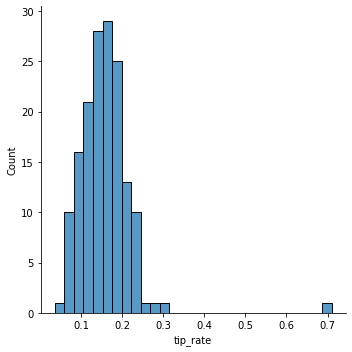

In [15]:
#※データの分布も一緒に確認する癖をつける
#ヒストグラムを描画する
#男性のチップ率 →正規分布のように見えるが、本当にそうかはわからない(Q-Qプロット)
sns.displot(tip_male)

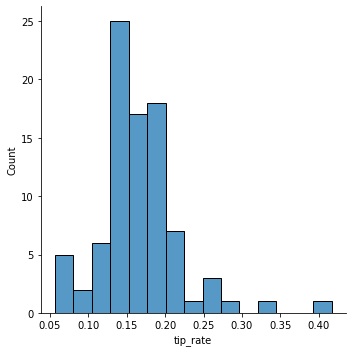

In [11]:
#女性のチップ率
sns.displot(tip_female)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

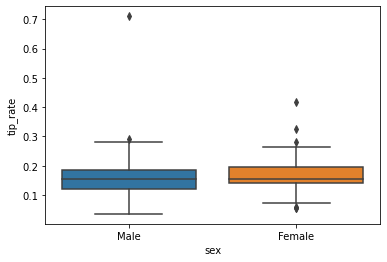

In [16]:
#ヒストグラムでは図が別になって比較しづらいので箱ひげ図を描画する
sns.boxplot(data=df, x='sex', y='tip_rate')

## Q-Qプロット

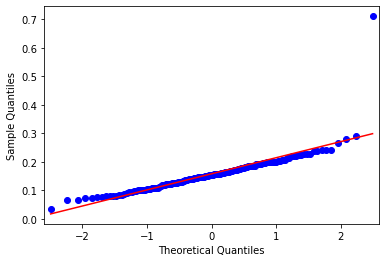

In [30]:
#正規性と等分散性の検定
#・小標本の場合、「正規分布かどうか」と「等分散かどうか」の2つを確認する必要がある
# シャピロ-ウィルク検定:正規性の検定。母集団が正規分布かどうかの検定
# F検定：2つの母集団の分散が等しいかどうかの検定
#※検定の前に検定を行うことを正しくないという指摘もある(検定の多重性)

#シャピロ-ウィルク検定
#・正規性の検定
#・得られた標本が正規分布からの標本なのかどうか→母集団が正規分布かどうか(たいていの検定は正規分布であることが前提となっているので)
#・仮説
# 帰無仮説:母集団が正規分布に従う(観測分布と正規分布に差がない) ←今までと違って、棄却することを狙っていない
# 対立仮説:母集団が正規分布に従わない
# ※正し、帰無仮説を棄却できなかったからといって「＝正規分布である」と結論づけることは、必ずしもできるわけではない

#Q-Qプロット(Quantile-Quantileプロット) quantile:分位数(データを区切るということ)
#・QQプロットでも可
#・シャピロウィルク検定はQ-Qプロットを使った検定
#・得られたデータが理論上の分布(例えば正規分布)にどれくらい近しいかを視覚的に確認できる
# 正規分布との比較
# Q-Qプロットを使用することで、正規分布とどれくらい近いか/離れているかがわかる
# 点が直線に近ければ、観測データは理論分布に近い

#Q-Qプロットを描画する
#※デフォルトだと標準正規分布との比較の描画
#statsmodels.api.qqplot(data, line='r')
#引数
#  data:データセット
#  line:'r'=regression(回帰)
#  dist:理論分布(デフォルトは標準正規分布)
#戻り値
#  matplotlibのfigure
#注意
#  qqplotの関数内で１回描画、戻り値でもう一つ、計2個のプロットが描画される

#-例-
#データセット(tips.csv)の男女のtip_rateをQ-Qプロットする(標準正規分布との比較)
#データセットの作成
tipr_male = df[df['sex'] == 'Male']['tip_rate']     #男性のチップ率
tipr_female = df[df['sex'] == 'Female']['tip_rate'] #女性のチップ率

#tipr_maleのQ-Qプロット(標準正規分布)
#※2個のプロットが描画されるので、戻り値のみ描画するようにする
fig = qqplot(tipr_male, line='r')

#結果
# 直線に近くなっている→正規分布に近いと言える

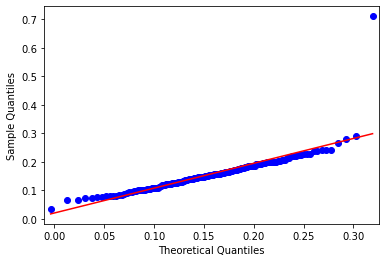

In [22]:
#違う正規分布(tipr_maleの平均と不偏分散の平方根)でQ-Qプロットする
fig = qqplot(tipr_male, 
             line='r', 
             dist=stats.norm(loc=np.mean(tipr_male), scale=np.sqrt(stats.tvar(tipr_male))))

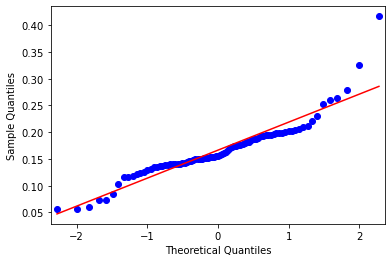

In [23]:
#tipr_femaleのQ-Qプロット(標準正規分布)
fig = qqplot(tipr_female, line='r')

#結果
# 正規分布から少し逸脱していそう(多分外れ値を除外すれば近くなりそう)

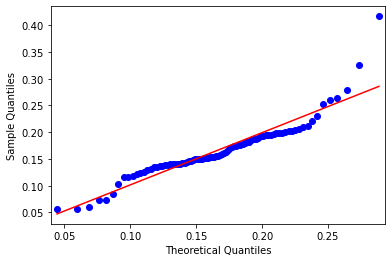

In [24]:
#違う正規分布(tipr_femaleの平均と不偏分散の平方根)でQ-Qプロットする
fig = qqplot(tipr_female, 
             line='r', 
             dist=stats.norm(loc=np.mean(tipr_female), scale=np.sqrt(stats.tvar(tipr_female))))

## シャピロ-ウィルク検定

In [25]:
#・Q-Qプロットと併せて使う
#・Q-Qプロットにおいて、どれくらい直線からずれているかを検定する
#・標本の順序統計量(得られた標本を小さい順に並べたもの)と正規分布の順序統計量の期待値の相関を検定統計量にする
#・背後のロジックは大変複雑なので、下記をおさえる：
# 帰無仮説がなんなのか
# 帰無仮説を棄却するとはどういうことなのか

#シャピロ-ウィルク検定をする
#データxに正規性があるかを検定する
#stats.shapiro(x)
#引数
#  x:正規性を確認したいデータ(Array)
#戻り値
#  第１:検定統計量
#  第２:p値→ここを見て、帰無仮説が棄却できるかどうかを判定する
#注意
#  外れ値に注意する。外れ値は正規分布から絶対に取ってこれないデータになってしまうので検定の結果p値がものすごく小さいものになってしまう

#-例-
#データセット(tip.csv)の男女のtip_rateに正規性があるかを検定する
#データセットの作成
tipr_male = df[df['sex'] == 'Male']['tip_rate']     #男性のチップ率
tipr_female = df[df['sex'] == 'Female']['tip_rate'] #女性のチップ率

#シャピロ-ウィルク検定(男性)
stats.shapiro(tipr_male)

#結果
#  p値は非常に小さい(0.05以下)→母集団と正規分布に差がない=母集団は正規分布であるという帰無仮説が棄却できる
#  つまり、このデータtipr_maleは正規分布からのデータではない(実は外れ値のせい)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [26]:
#シャピロ-ウィルク検定(女性)
stats.shapiro(tipr_female)

#結果
#  男性と同じくp値は非常に小さい→このデータtipr_femaleは正規分布からのデータではない

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [41]:
#上記の結論は、外れ値があるため
#外れ値を除いたらどうなるか？
#男性のデータ
stats.shapiro(np.sort(tipr_male)[:-1])

#結果
#  p値はかなり大きくなり、帰無仮説を棄却できなくなる=正規分布である事を否定できない

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [43]:
#女性のデータ(外れ値は２つ)
stats.shapiro(np.sort(tipr_female)[:-2])

#結果
#  p値は0.05を下回る→シャピロ-ウィルク検定では帰無仮説は棄却できない=正規分布からの標本とは言えない

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F分布

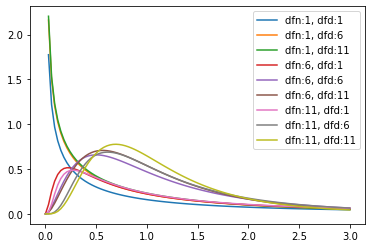

In [27]:
#F検定
#・等分散性の検定
#・２群の等分散性の検定には、分散の比率を検定統計量に使う
#・仮説
# 帰無仮説:分散に差がない
# 対立仮説:分散に差がある
# ※正し、帰無仮説を棄却できなかったからといって「＝分散に差がない」と結論づけることは、必ずしもできるわけではない
#・母集団が正規分布であることを前提にしている
#・分散の比率の標本分布であるF分布を見る

#F分布
#・よくカイ二乗を使って表される
# カイ二乗(のもう1つの定義)：平均μ分散σ2の正規分布からn個取り出し、その偏差の平方和を分散で割った式
#・自由度が2つある(n1-1, n2-1)
#・F値は１以上
# 大きい方の分散を分子に置くため
#・p値はF値より右側の面積になる

#F分布を計算する
#stats.f(dfn, dfd)
#引数
#  dfn:分子の自由度
#  dfd:分母の自由度
#F分布の描画
#stats.f(dfn, dfd).pdf(x)
#下記の書き方でも可
#stats.f.pdf(x, dfn=dfn, dfd=dfd)

#-例-
#いろんな値で、それぞれの自由度のF分布はどういうグラフになるのかを見る

#x軸のデータの作成
x = np.linspace(0, 3, 100) #マイナス値を取ることはないので0から始める

#分子と分母の自由度にいろいろな値を入れてF分布を描画する
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f(dfn, dfd).pdf(x) #f分布の確率密度関数
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')

#凡例
plt.legend()

## F検定

In [28]:
#-例-
#データセット(tips.csv)の男女のtip_rateの分散に差があるかをF分布を使ってF検定する
#→男女のチップ率の等分散性を見る
#データセットの作成
tipr_male = df[df['sex'] == 'Male']['tip_rate']     #男性のチップ率
tipr_female = df[df['sex'] == 'Female']['tip_rate'] #女性のチップ率

#分散の確認
print("male variance:{} / female variance:{}".format(np.var(tipr_male), np.var(tipr_female)))

#不偏分散の比率を計算
#値が大きい方を分子にする
#→男性の方が分散が高いので、男性のデータセットを標本１、女性のデータセットを標本２とする
#自由度
dfn = len(tipr_male) - 1
dfd = len(tipr_female) - 1
#不偏分散
sample1_var = stats.tvar(tipr_male)
sample2_var = stats.tvar(tipr_female)
#F値(それぞれの不偏分散の比率)
f_val = sample1_var / sample2_var
print("F value:{}".format(f_val))

#このF値がどれくらいの確率で得られるか
#F値から右側の面積を計算する(.sf()) 左側は.cdf()
stats.f(dfn=dfn, dfd=dfd).sf(f_val)

#結論
# 有意水準0.05より小さい値となるので、母集団の分散には差がある(等分散ではない)

male variance:0.004169445577529407 / female variance:0.0028433004255488206
F value:1.4588472200534603


0.027100863454374447

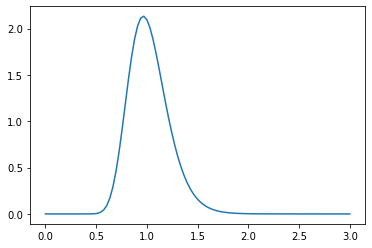

In [29]:
#お試し描画(xの値は適当)
x = np.linspace(0, 3, 100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)

#F値は1.46なので、その位置から右側の面積がp値になる(.sf())

## 対応ありの平均値差の検定(t検定)

In [2]:
#対応ありの平均値差の検定
#・2つの標本において、個々のデータに対応がある場合
#・施策前後で同じ標本の個々のデータに差があるかを見る
# この差のことを変化量という
#・各データの変化量dを1つの標本として、その平均を考える
#・母集団も変化量を考える
#→変化量にも母集団と標本が存在する
# 変化量の平均の標本分布がどうなるかを考える

#変化量の平均の標本分布
#・変化量の母集団からの無作為抽出だと考えれば、変化量の標本平均は
# 変化量の標本平均は平均μd、分散σ2d/nの正規分布となる
# μdは変化量の母集団の平均、σ2dは変化量の母集団の分散

#変化量の平均の標本分布
#・棄却域がどこなのかがわからないので標準化することを考える
#・標準化することでz分布で考えることが可能
#・母標準偏差σdは未知なので、標本の変化量の不偏分散の平方根s'dを推定量として使用→t分布となる
#・帰無仮説が正しいと仮定した場合の検定統計量tを考える
#・標本から計算した検定統計量tが自由度n-1のt分布において棄却域に入るかを考える
#・最終的には変化量というデータに対しての平均が0になるかどうかの検定をしている
# １群の平均値が0になるかどうかの検定

#対応ありの平均値差の検定をする
#stats.ttest_rel(a, b, alternative)
#※rel=related
#引数
#  a,b:データセット(ペア同士が同じ順番になっている必要がある)
#  alternative: 対立仮説。'two-sided'(デフォルト), 'less','greater'
#戻り値
#  第１:検定統計量t
#  第２:p値

#※対応なしt検定
#stats.ttest_ind()

#-例-
#血圧データを使用して対応ありのt検定をやる
#とある薬の投薬前と後で血圧に差はあるか？
#帰無仮説:投薬前後で差がない
#対立仮説:投薬前後で差がある(投薬前の血圧の方が高い)
bp_df = pd.read_csv('data/blood_pressure.csv')
#対応ありのt検定(beforeはafterよりも大きい)
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

#結果
# p値は有意水準0.05より小さい→棄却域に入るので「差がない」という帰無仮説を棄却できる＝beforeとafterで差がある(薬の効果はありそう)

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [3]:
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [6]:
#実際の検定では必ずデータの分布をみる
#beforeの平均値
np.mean(bp_df['bp_before'])

156.45

In [7]:
#afterの平均値
np.mean(bp_df['bp_after'])

151.35833333333332

In [8]:
#個々の差の平均(変化量)を計算する
#個々の差のカラムdeltaを追加する
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [28]:
bp_df

,patient,sex,agegrp,bp_before,bp_after,delta
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5
...,...,...,...,...,...,...
115,116,Female,60+,152,152,0
116,117,Female,60+,161,152,9
117,118,Female,60+,165,174,-9
118,119,Female,60+,149,151,-2


In [31]:
#delta(個々の差)の平均(変化量 投薬でどれくらい下がったか)
bp_df['delta'].mean()

5.091666666666667

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delta'>

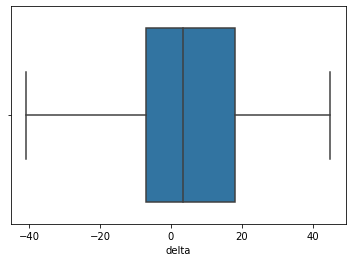

In [9]:
#delta(before - after)の分布
sns.boxplot(bp_df['delta'])

#結果
# 中央値は0より高く、全体的なデータの分布もプラス側に寄っている→beforeの方が血圧が高い

## Cohen's d(コーエンのd)

In [8]:
#検定の誤りと検定力
#・２種類の検定の誤り(＝検定の結果が事実と異なる)
#・検定力:どれだけ正しく帰無仮説を棄却し、対立仮説を成立できるか

#第1種の誤りと第２種の誤り
# 帰無仮説が正しい
#  帰無仮説を採択
#  帰無仮説を棄却→第１種の誤り(発生確率α)
# 帰無仮説が正しくない(対立仮説が正しい)
#  帰無仮説を採択→第2種の誤り(発生確率β)
#  帰無仮説を棄却→検定はここを目指す
#
#第1種の誤りが発生する確率(α)
#・帰無仮説が正しいのに帰無仮説を棄却してしまう
#・第1種の誤りの確率は有意水準と等しい
# 有意水準が5%であれば、第１種が起こる確率は5%
#
#第2種の誤りが発生する確率(β)
#・帰無仮説が正しくないのに帰無仮説を採択してしまう
#・帰無分布:帰無仮説が正しいとした時の検定統計量の分布→今までの学習で見ていたのはこっち
# 対立分布:対立仮説が正しいとした時の検定統計量の分布
#・対立分布のうち、棄却域に入らないエリアが第２種の発生確率となる
#
#αとβはトレードオフ
#・検定の際の誤りはなるべく下げたい
#・αとβはトレードオフの関係にあるため、同時に下げることはできない
# αを5%から下げる→αは小さくなるが、その分βは大きくなる
# αを5%から上げる→βは小さくなるが、その分αは大きくなる
#→どれだけ上手く帰無仮説を棄却できるか、を考える(検定力)

#検定力(power)
#・どれだけ正しく帰無仮説を棄却し対立仮説を成立できるかの確率
# 対立仮説が正しいという前提で「どれだけ正しく対立仮説を成立できるか」がポイント
# ※ただし、検定力が高ければ高いほどいいというわけではない。ある一定の高さを保つことが重要
#・検定力＝1-β
#・検定力に影響を与える3つの要素
# 1.有意水準
#   有意水準を高くすると検定力(1-β)も高くなる
#   が、検定力を上げるために有意水準を上げるのはだめ(検定が甘くなるから)
#   特に理由がなければ5%か1%とする
# 2.サンプルサイズ(標本の大きさ)
#   検定者が唯一コントロールできる項目
#   サンプルサイズを大きくする(標本(のデータ)を増やす)と検定力(1-β)も大きくなる
#   サンプルサイズを大きくすると標本分布の分散は小さくなり、母集団の検定統計量に近づくため
#   ただし、単にサンプルサイズを大きくするのには注意が必要
#    帰無分布と対立分布が近いと(母集団に差はあるが、ほんの少しだけ)、微小の差でも「有意差あり」と出てしまう
#    「どれくらい」差があるかを考慮していない
# 3.帰無分布と対立分布の差(帰無分布と対立分布がどれだけ離れているか)
#   効果量:帰無分布と対立分布がどれだけ離れているか、検出したい差(=効果)の量
#   効果量が大きいと、検定力が大きくなる
#・検定力と3つの要素のバランス
# 検定力:1つの目安として、0.8を目指す
# 有意水準:5%か1%で固定
# サンプルサイズ:検定力が0.8となるように適切な値を指定する
# 効果量:標本や過去の経験から仮定する

#Cohen's d(コーエンのd)
#・標本から計算する標準化された効果量の指標
#・1を超えることもあるので注意
#・実際には絶対値を取ることが多い
#・効果量の目安
# 0.2:小
# 0.5:中
# 0.8:大

#Cohen's d(コーエンのd)を返す関数を作成する(pythonのメソッドはない)
#式
#x¯1 - x¯2/σ^
#σ^ = √ (n1-1)s'21+(n2-1)s'22/n1+n2-2
# s'21:n1のs'2 s'22:n2のs'2
def cohen_d(x1, x2):
    #標本の数
    n1 = len(x1)
    n2 = len(x2)
    
    #式をコードに変換する
    #n1+n2-2:σ^の推定値の分母＝全体の自由度
    dof = n1 + n2 - 2
    #σ^を求める
    std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
    
    #Cohen's d
    #それぞれの平均の差/std(絶対値)
    return np.abs((np.mean(x1) - np.mean(x2))/std)


In [4]:
#-例-
#データセット(tips.csv)を標本として、男女のチップ率の効果量(Cohen's d)を求める
#→効果量はそれほど高くはないだろうと予想する
#データセットの作成
male_tip_rate = df[df['sex'] == 'Male']['tip_rate']     #男性のチップ率
female_tip_rate = df[df['sex'] == 'Female']['tip_rate'] #女性のチップ率

#Cohen's d
cohen_d(male_tip_rate, female_tip_rate)

#結果
# 目安の効果量小(0.2)より小さいので、効果量はかなり小さい(予想通り)

0.14480153987269248

## 検定力分析(power analysis)

In [18]:
#検定力分析により、有意水準、効果量、最適なサンプルサイズ、検定力を算出する
#検定力は一般的に約0.8を目指す
#※ここでは「対応なしの２群の平均値差の検定」を例とする
#用途は主に2つ:
#1.検定の結果として、p値だけでなく効果量も併せて報告する
#  すでに手元に標本があって、それを検定に使用するケース
#2.想定する効果量に基づいて適切なサンプルサイズを算出する
#  これから標本抽出から始めるケース(検定のデザイン)

#効果量(effect size)
#・検定で明らかにしたい差の量
#・２群の平均値さにどれくらいの差があるかを表した量
#・単にμ1-μ2ではなく、標準化が必要
# →効果量を「標準偏差(σ)いくつ分離れているか？」で測る
#  μ1-μ2/σ ※全て母集団の平均、標準偏差
#   μ1-μ2:母集団1と母集団2の平均を推定→標本1と標本2の平均を使用する
#   σ:母集団1と母集団2の共通の標準偏差(pooled std)を推定→標本1と標本2を合わせた標準偏差(不偏分散の平方根)を使用する

#検定力を算出する
#statsmodels.stats.power.TTestIndPowerクラス
#２群の平均値差を検定する際の検定力分析用のクラス
#有意水準、効果量、検定力、サンプルサイズを残りの値から算出する
#power = TTestIndPower()でインスタンス化
#.solve_power(effect_size, nob1, alpha, power, ratio, alternative)
#引数
# 算出したい引数には"None"を設定する
#  effect_size:効果量(cohen's d)
#  nobs1:標本1のサイズ
#  alpha:有意水準(0.05)
#  power:検定力(帰無仮説を正しく棄却できる確率)
#  ratio:標本１に対する標本２の大きさ(標本２/標本１)
#  alternative:対立仮説 'two-sided', 'smaller', 'larger'

#-例1-
#データセット(tips.csv)を標本として、男女のチップ率の平均値差の検定を行った場合の検定力を求める
#なお、以下とする:
# ・両側検定
# ・有意水準5%(0.05)

#パラメータ
#標本1,2
male_tip_rate = df[df['sex'] == 'Male']['tip_rate']     #標本1:男性のチップ率
female_tip_rate = df[df['sex'] == 'Female']['tip_rate'] #標本2:女性のチップ率
#Cohen's d
cohensd = cohen_d(male_tip_rate, female_tip_rate)       #前述の関数を使用
#標本１に対する標本２の大きさ
ratio = len(female_tip_rate) / len(male_tip_rate)

#statsmodels.stats.power.TTestIndPowerをインスタンス化
power = TTestIndPower()

#solve_powerをコールして検定力を算出する
#検定力を求めたいので、引数"power"に"None"を設定する
#alternative='two-sided' デフォルトなので指定しなくてよい
power.solve_power(effect_size = cohensd,
                  nobs1 = len(male_tip_rate),
                  alpha=0.05,
                  power=None,  
                  ratio=ratio) 

#結果
# 検定力は0.8に対して非常に低い

0.19038260700802212

In [12]:
#-例2-
#検定力を上げるには？→サンプルサイズを増やす
#データセット(tips.csv)を標本として、男女のチップ率の平均値差の検定を行う場合、検定力を0.8とするために必要なサンプルサイズを求める
#なお、以下とする:
# ・両側検定
# ・有意水準5%(0.05)
# ・効果量は手元にある標本から仮定する

#solve_powerをコールしてサンプルサイズを算出する
#サンプルサイズを求めたいので、引数"nobs1"に"None"を設定する
#alternative='two-sided' デフォルトなので指定しなくてよい
power.solve_power(effect_size = cohensd,
                  nobs1 = None,
                  alpha=0.05,
                  power=0.8,
                  ratio=ratio)

#結果
# 男性のチップ率は、1051個あれば検定力を0.8に保てそう

1051.0959553846506

In [13]:
#女性のチップ率に必要な数
len(female_tip_rate) / len(male_tip_rate) * 1051

#結果
# 女性のチップ率は、582個あれば検定力を0.8に保てそう

582.4012738853503

In [14]:
#手元にデータがない場合、適当な値を想定して設定する
#男女のチップ率の差はそんなにないかも、と思う場合は
#  effect_size=0.2 効果量小
# 　ratio=1 男女同数を取ってこれると仮定する
power.solve_power(effect_size = 0.2,
                  nobs1 = None,
                  alpha=0.05,
                  power=0.8,
                  ratio=1)

#結果
# 男女で400個ほどあれば検定力を0.8に保てそう

393.4056989990335

## 検定力の推移

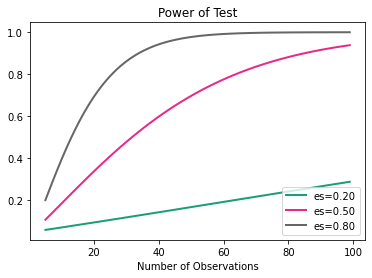

In [16]:
#それぞれの効果量において、サンプルサイズの変化に応じて検定力がどう変化するかを描画する

#statsmodels.stats.power.TTestIndPowerクラス
#２群の平均値差を検定する際の検定力分析用のクラス
#power = TTestIndPower()でインスタンス化
#.plot_power(dep_var, nobs, effect_size, alpha)
#引数
# dep_var:x軸の変数
#         'nobs'        サンプルサイズに対しての検定力の推移を見たい場合
#         'effect_size' 効果量に対しての検定力の推移を見たい場合
#         'alpha'       有意水準に対しての検定力の推移を見たい場合
# nobs:標本のサイズ(x軸のNumpy Array)
# effect_size:効果量のリスト
# alpha:有意水準(0.05)
#戻り値
# matplotlibのfigure
#注意
# plot_powerの関数内で１回描画、戻り値でもう一つ、計2個のプロットが描画される

#statsmodels.stats.power.TTestIndPowerをインスタンス化
power = TTestIndPower()
#戻り値だけを描画する
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5,100)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)